### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.float_format = '{:2f}'.format

### Importing Datasets

In [ ]:
# converting the dataset from JSON to excel format
receipts = pd.read_json('receipts.json', lines = True)
receipts.to_excel('modifyreceipts.xlsx')

users = pd.read_json('users.json', lines = True)
users.to_excel('modifyusers.xlsx')

brands = pd.read_json('brands.json', lines = True)
brands.to_excel('modifybrands.xlsx',index='_id')

In [ ]:
print(receipts['_id'].to_string())

0       {'$oid': '5ff1e1eb0a720f0523000575'}
1       {'$oid': '5ff1e1bb0a720f052300056b'}
2       {'$oid': '5ff1e1f10a720f052300057a'}
3       {'$oid': '5ff1e1ee0a7214ada100056f'}
4       {'$oid': '5ff1e1d20a7214ada1000561'}
5       {'$oid': '5ff1e1e40a7214ada1000566'}
6       {'$oid': '5ff1e1cd0a720f052300056f'}
7       {'$oid': '5ff1e1a40a720f0523000569'}
8       {'$oid': '5ff1e1ed0a7214ada100056e'}
9       {'$oid': '5ff1e1eb0a7214ada100056b'}
10      {'$oid': '5ff1e1c50a720f052300056c'}
11      {'$oid': '5ff1e1a10a720f0523000568'}
12      {'$oid': '5ff1e1b60a7214ada100055c'}
13      {'$oid': '5f9c74f70a7214ad07000037'}
14      {'$oid': '5ff1e1b20a7214ada100055a'}
15      {'$oid': '5ff1e1e90a7214ada1000569'}
16      {'$oid': '5ff1e1df0a7214ada1000564'}
17      {'$oid': '5ff1e1b40a7214ada100055b'}
18      {'$oid': '5ff1e1eb0a720f0523000576'}
19      {'$oid': '5ff1e1c80a720f052300056d'}
20      {'$oid': '5f9c74f90a7214ad07000038'}
21      {'$oid': '5ff1e1960a720f0523000567'}
22      {'

###  1. Analyzing Brands dataset


#### 1.1 General info about dataset.

In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


In [ ]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.000000,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.000000,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.000000,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.000000,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.000000,TEST BRANDCODE @1612366146827


#### 1.2 Analyzing Missing Data

In [ ]:
# missing value counts
brands.isnull().sum()

_id               0
barcode           0
category        155
categoryCode    650
cpg               0
name              0
topBrand        612
brandCode       234
dtype: int64

In [ ]:
# getting average missing values in each column
null_values = brands.isnull().mean()

# in percentage
for i,j in null_values.items():
  if j>0:
    print(i,":",j*100)

category : 13.281919451585262
categoryCode : 55.69837189374465
topBrand : 52.44215938303341
brandCode : 20.051413881748072



 *More than 50% missing values in topBrand and categorycode*

#### 1.3 Brand categories distribution

In [ ]:
brands['category'].value_counts()

Baking                         369
Beer Wine Spirits               90
Snacks                          75
Candy & Sweets                  71
Beverages                       63
Magazines                       44
Health & Wellness               44
Breakfast & Cereal              40
Grocery                         39
Dairy                           33
Condiments & Sauces             27
Frozen                          24
Personal Care                   20
Baby                            18
Canned Goods & Soups            12
Beauty                           9
Cleaning & Home Improvement      6
Deli                             6
Beauty & Personal Care           6
Household                        5
Bread & Bakery                   5
Dairy & Refrigerated             5
Outdoor                          1
Name: category, dtype: int64

In [ ]:
# to get in percentage.
percentage_cat = (brands['category'].value_counts()/len(brands))*100
print(percentage_cat.map('{:,.2f}%'.format))

Baking                         31.62%
Beer Wine Spirits               7.71%
Snacks                          6.43%
Candy & Sweets                  6.08%
Beverages                       5.40%
Magazines                       3.77%
Health & Wellness               3.77%
Breakfast & Cereal              3.43%
Grocery                         3.34%
Dairy                           2.83%
Condiments & Sauces             2.31%
Frozen                          2.06%
Personal Care                   1.71%
Baby                            1.54%
Canned Goods & Soups            1.03%
Beauty                          0.77%
Cleaning & Home Improvement     0.51%
Deli                            0.51%
Beauty & Personal Care          0.51%
Household                       0.43%
Bread & Bakery                  0.43%
Dairy & Refrigerated            0.43%
Outdoor                         0.09%
Name: category, dtype: object


*Majority of brands are in Baking category, which shows skew in the distribution and some level of bias if used for prediction analysis.*

#### 1.4 Check for duplicate instances



In [ ]:
# Converting datatypes of variables so that they hashable
brands[['_id','category','categoryCoded','cpg','name','brandCode']] = brands[['_id','category','categoryCode','cpg','name','brandCode']].astype('string')

df = brands[brands.duplicated(keep=False)]
print(df)

Empty DataFrame
Columns: [_id, barcode, category, categoryCode, cpg, name, topBrand, brandCode, categoryCoded]
Index: []


*The above dataframes of duplicate instances is empty thus no redundancies in the data*

In [ ]:
# categories of brands which are featured as top brands
topbrands_dist = (brands.topBrand == 1).groupby(brands.category).sum()

# categories which has featured brands(counts > 0)
topbrands_dist.sort_values(ascending = False).head(10)

category
Snacks                 13
Baby                    5
Grocery                 3
Beverages               2
Frozen                  2
Breakfast & Cereal      2
Condiments & Sauces     1
Magazines               1
Baking                  1
Dairy                   1
Name: topBrand, dtype: int64

##  2. Analyzing Receipts dataset

#### 2.1 General information about dataset

In [ ]:
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

###### Classifying variables:
##### a) Discrete: bonusPointsEarned (binary)
##### b) Continuous: pointsEarned, purchasedItemCount, totalSpent
##### c) Categorical: _id, bonusPointsEarnedReason, rewardsReceiptItemList, rewardsReceiptStatus, userId

In [ ]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.000000,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.000000,{'$date': 1609632000000},5.000000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.000000,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.000000,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.000000,{'$date': 1609601083000},2.000000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.000000,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.000000,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.000000,{'$date': 1609632000000},1.000000,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.000000,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.000000,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.000000,{'$date': 1609632000000},4.000000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.000000,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.000000,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.000000,{'$date': 1609601106000},2.000000,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.000000,5ff1e194b6a9d73a3a9f1052


#### 2.2 Analyzing Missing data

In [ ]:
receipts.isnull().sum()

_id                          0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

In [ ]:
# getting average missing values in each column
null_values1 = receipts.isnull().mean()

# in percentage
for i,j in null_values.items():
  if j>0:
    print(i,":",j*100)

bonusPointsEarned : 51.385165326184094
bonusPointsEarnedReason : 51.385165326184094
finishedDate : 49.240393208221626
pointsAwardedDate : 52.01072386058981
pointsEarned : 45.57640750670242
purchaseDate : 40.03574620196604
purchasedItemCount : 43.25290437890974
rewardsReceiptItemList : 39.32082216264522
totalSpent : 38.8739946380697


Looking at the missing data volume, we can highlight following concerns:*

a) Almost 50% of receipts did not capture the rewards information (all columns with rewards)

b) Other features like purchasedItemCount and totalSpent for each receipt/transaction is not captured, which can help understand user behaviour and choices for particular offers or bonus points benefits.

c) Without temporal data we cannot do any time series analysis which are necessary for various stakeholders (finance, marketing & operations)


#### 2.3 Check for duplicate instances.

In [ ]:
# Converting datatypes of variables so that they hashable
# i. object to string.
receipts[['_id','bonusPointsEarnedReason','rewardsReceiptItemList','rewardsReceiptStatus','userId','createDate','dateScanned','finishedDate','modifyDate','pointsAwardedDate','purchaseDate']] = receipts[['_id','bonusPointsEarnedReason','rewardsReceiptItemList','rewardsReceiptStatus','userId','createDate','dateScanned','finishedDate','modifyDate','pointsAwardedDate','purchaseDate']].astype('string')

In [ ]:
df1 = receipts[receipts.duplicated(keep=False)]
print(df1)

Empty DataFrame
Columns: [_id, bonusPointsEarned, bonusPointsEarnedReason, createDate, dateScanned, finishedDate, modifyDate, pointsAwardedDate, pointsEarned, purchaseDate, purchasedItemCount, rewardsReceiptItemList, rewardsReceiptStatus, totalSpent, userId]
Index: []


*The above dataframes of duplicate instances is empty thus no redundancies in the data*

#### 2.4 Distribution of various reasons for bonus rewards earned.


In [ ]:
# to get in percentage.
reasons_dist = (receipts['bonusPointsEarnedReason'].value_counts()/len(receipts))*100
print(reasons_dist.map('{:,.2f}%'.format))

<NA>                                                 51.39%
All-receipts receipt bonus                           16.35%
Receipt number 1 completed, bonus point schedu...    10.63%
COMPLETE_NONPARTNER_RECEIPT                           6.34%
COMPLETE_PARTNER_RECEIPT                              3.49%
Receipt number 3 completed, bonus point schedu...     2.77%
Receipt number 2 completed, bonus point schedu...     2.68%
Receipt number 5 completed, bonus point schedu...     2.41%
Receipt number 4 completed, bonus point schedu...     2.32%
Receipt number 6 completed, bonus point schedu...     1.61%
Name: bonusPointsEarnedReason, dtype: object


#### 2.5 Checking distribution of various features to identify outliers.

<ipython-input-144-8ea16626cb05>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(receipts[receipts[var].notnull()][var], ax = axs[i]);
<ipython-input-144-8ea16626cb05>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(receipts[receipts[var].notnull()][var], ax = axs[i]);
<ipython-input-144-8ea16

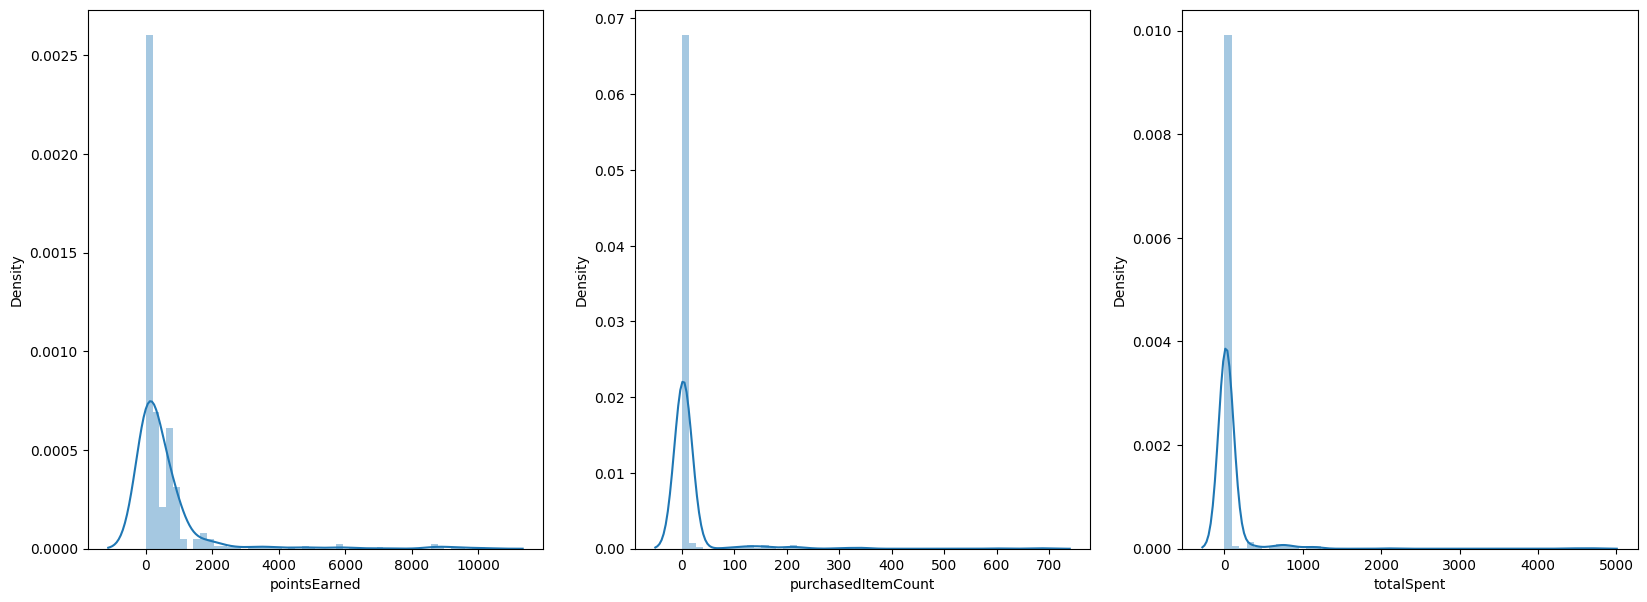

In [ ]:
fig, axs = plt.subplots(ncols =  3, nrows = 1, figsize = (20,7))
col_list = ['pointsEarned','purchasedItemCount','totalSpent']
for i,var in enumerate(col_list):
  sns.distplot(receipts[receipts[var].notnull()][var], ax = axs[i]);

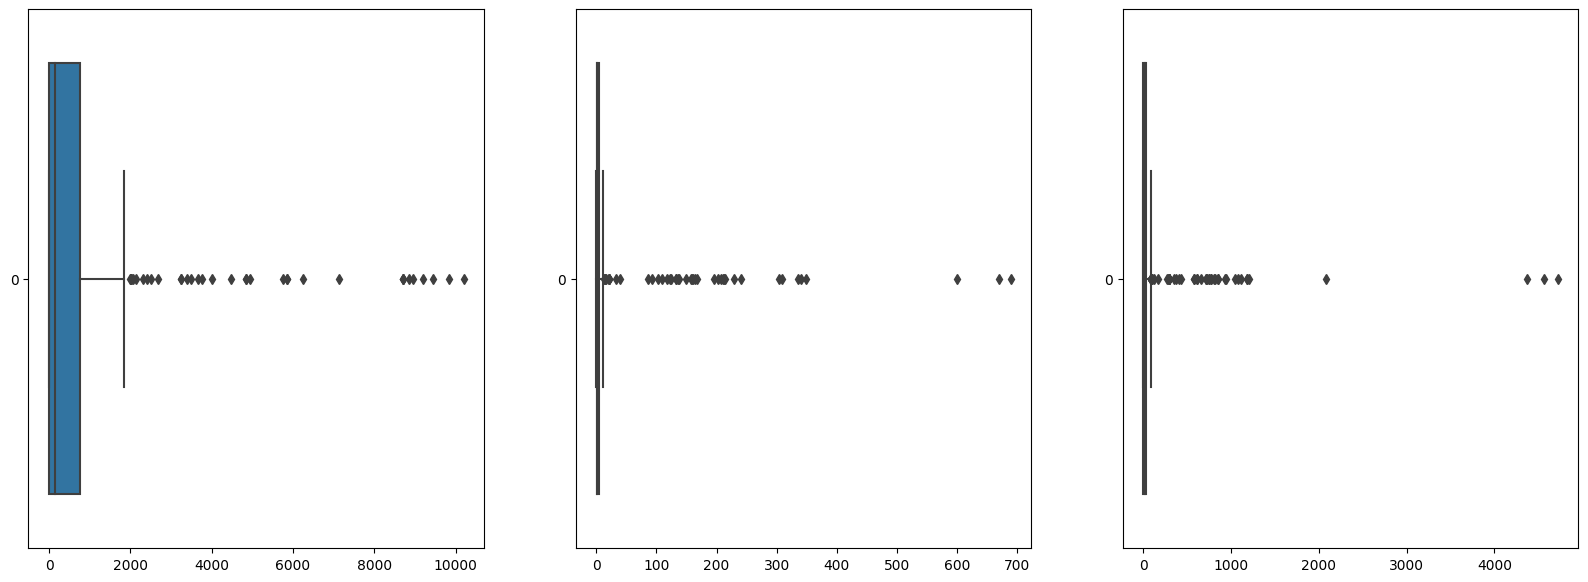

In [ ]:
fig, axs = plt.subplots(ncols =  3, nrows = 1, figsize = (20,7))
col_list = ['pointsEarned','purchasedItemCount','totalSpent']
for i,var in enumerate(col_list):
  sns.boxplot(receipts[receipts[var].notnull()][var], ax = axs[i],orient = 'h');

*Distribution of all continuous variables is right skewed, both box plots and distribution suggests that there are outliers in the data which can have negative/biased impact on the analysis.*

### 3. Analyzing Users dataset

#### 3.1 General information about dataset

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


In [ ]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


#### 3.2 Analyzing missing data

In [ ]:
users.isnull().sum()

_id              0
active           0
createdDate      0
lastLogin       62
role             0
signUpSource    48
state           56
dtype: int64

In [ ]:
# getting average missing values in each column
null_values = users.isnull().mean()

# in percentage
for i,j in null_values.items():
  if j>0:
    print(i,":",j*100)

lastLogin : 12.525252525252526
signUpSource : 9.696969696969697
state : 11.313131313131313


*Compared to other dataset we have low volume of missing data, which can help understand user behaviour and interaction on the application platform*

#### 3.3 Check for duplicate instances

In [ ]:
users[['_id','createdDate','lastLogin','role','signUpSource','state']] = users[['_id','createdDate','lastLogin','role','signUpSource','state']].astype(str)

In [ ]:
df2 = receipts[receipts.duplicated(keep=False)]
print(df2)

Empty DataFrame
Columns: [_id, bonusPointsEarned, bonusPointsEarnedReason, createDate, dateScanned, finishedDate, modifyDate, pointsAwardedDate, pointsEarned, purchaseDate, purchasedItemCount, rewardsReceiptItemList, rewardsReceiptStatus, totalSpent, userId]
Index: []


In [ ]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


*The above dataframes of duplicate instances is empty thus no redundancies in the data*

### 3.4 Users distribution based on sources & state they reside in

In [ ]:
# to get in percentage.
sources = (users['signUpSource'].value_counts()/len(users))*100
print(sources.map('{:,.2f}%'.format))

Email     89.49%
nan        9.70%
Google     0.81%
Name: signUpSource, dtype: object


*90% users signup through email.*

In [ ]:
states = (users['state'].value_counts()/len(users))*100
print(states.map('{:,.2f}%'.format))

WI     80.00%
nan    11.31%
NH      4.04%
AL      2.42%
OH      1.01%
IL      0.61%
KY      0.20%
CO      0.20%
SC      0.20%
Name: state, dtype: object


*80% users are from Wisconsin*